In [1]:
from src.models import *
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import time

## Check Yukawa

In [ ]:
def gen_centers(num_particles, Ns):
    if len(Ns) == 1:
        return np.random.uniform(0, Ns[0], num_particles)
    else:
        return np.random.uniform(0, np.array(Ns), (num_particles, len(Ns)))

def gen_rho_ext(num_particles, Ns):
    rho_ext = np.zeros(Ns)
    for i in range(num_particles):
        indices = tuple(int(coord) for coord in centers[i])  # Convert coordinates to integer indices
        rho_ext[indices] += masses[i]
    return rho_ext



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


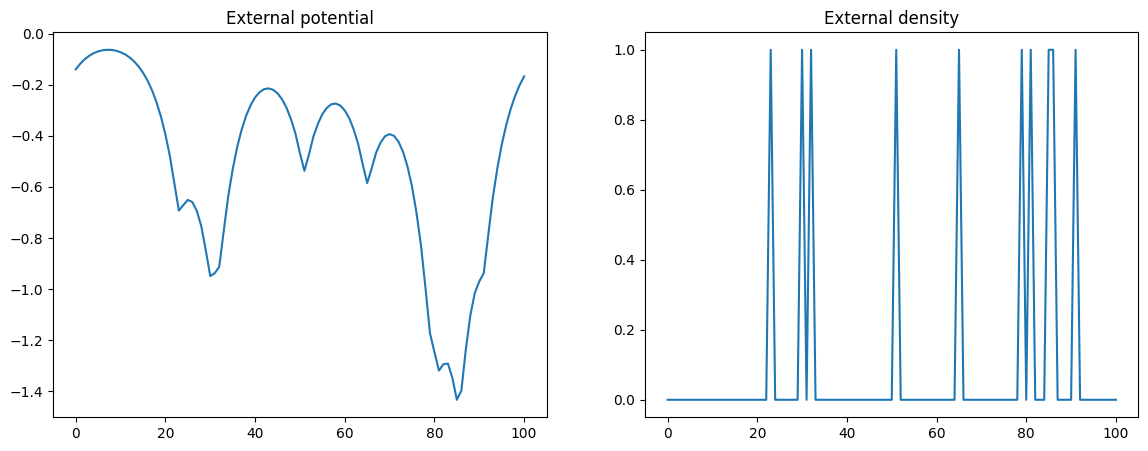

In [2]:
# 1 dimensional case 
Ns = (101,)
Ls = (20.0,)
alpha = 1
delta_V = np.prod(Ls) / np.prod(Ns)
num_particles = 10
H = genDiscretizedYukawaInteraction(Ns, Ls, alpha) 
H = np.real(H)

print(np.sum(H, axis=0)*delta_V)
centers = np.random.uniform(0, Ns[0], (num_particles))
masses = np.ones(num_particles)
rho_ext = np.zeros(Ns)
for i in range(num_particles):
    rho_ext[int(centers[i])] += masses[i]

potential_ext = -H@rho_ext

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("External potential")
plt.plot(potential_ext)
plt.subplot(1,2,2)
plt.title("External density")
plt.plot(rho_ext)
plt.show()


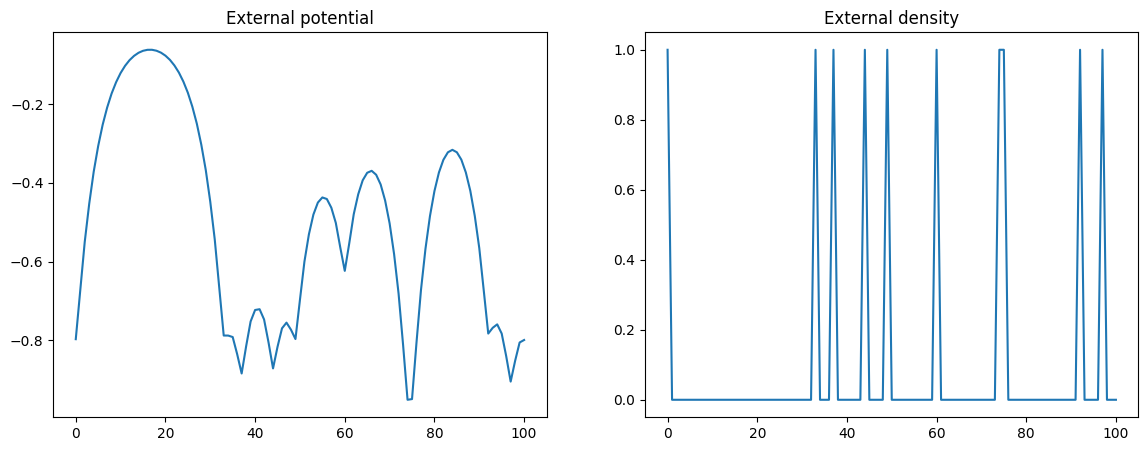

In [8]:
Ns = (101,)
Ls = (20.0,)
alpha = 1
ham = Hamiltonian(Ns, Ls, alpha=alpha)
ham.update_external_yukawa(0.5)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("External potential")
plt.plot(ham.potential_external)
plt.subplot(1,2,2)
plt.title("External density")
plt.plot(ham.density_external)
plt.show()

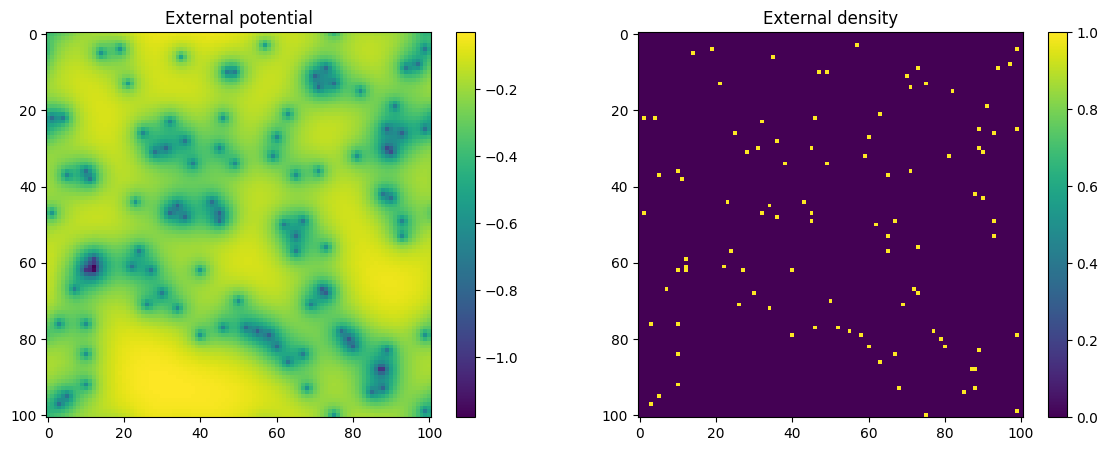

In [2]:
# 2d or higher dimension
Ns = (101,101)
Ls = (20.0,20.0)
alpha = 1
delta_V = np.prod(Ls) / np.prod(Ns)
num_particles = 10*10
H = genDiscretizedYukawaInteraction(Ns, Ls, alpha) 
H = np.real(H)

# print(np.sum(H, axis=0)*delta_V)
centers = np.random.uniform(0, np.array(Ns), (num_particles, len(Ns)))  # Generate random positions in all dimensions
masses = np.ones(num_particles)
rho_ext = np.zeros(Ns)
for i in range(num_particles):
    indices = tuple(int(coord) for coord in centers[i])  # Convert coordinates to integer indices
    rho_ext[indices] += masses[i]

potential_ext = -H@rho_ext.flatten()
potential_ext = potential_ext.reshape(Ns)

plt.figure(figsize=(14,5),dpi=100)
plt.subplot(1,2,1)
plt.imshow(potential_ext)
plt.title("External potential")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(rho_ext)
plt.title("External density")
plt.colorbar()
plt.show()

(10201,)


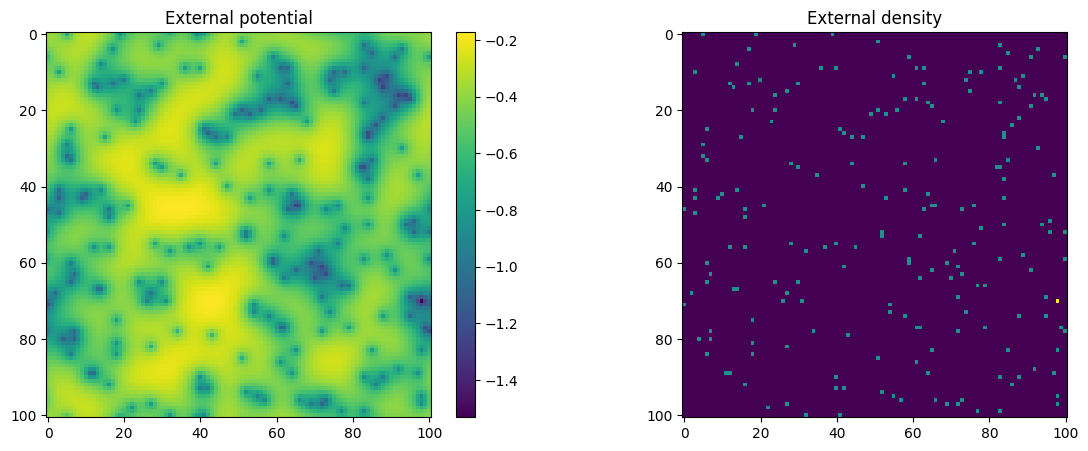

In [7]:
Ns = (101,101)
Ls = (20.0,20.0)
alpha = 1
ham = Hamiltonian(Ns, Ls, alpha=alpha)
ham.update_external_yukawa(0.5)
print(ham.potential_external.shape)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("External potential")
plt.imshow(ham.potential_external.reshape(Ns))
plt.colorbar()
plt.subplot(1,2,2)
plt.title("External density")
plt.imshow(ham.density_external.reshape(Ns))
plt.show()

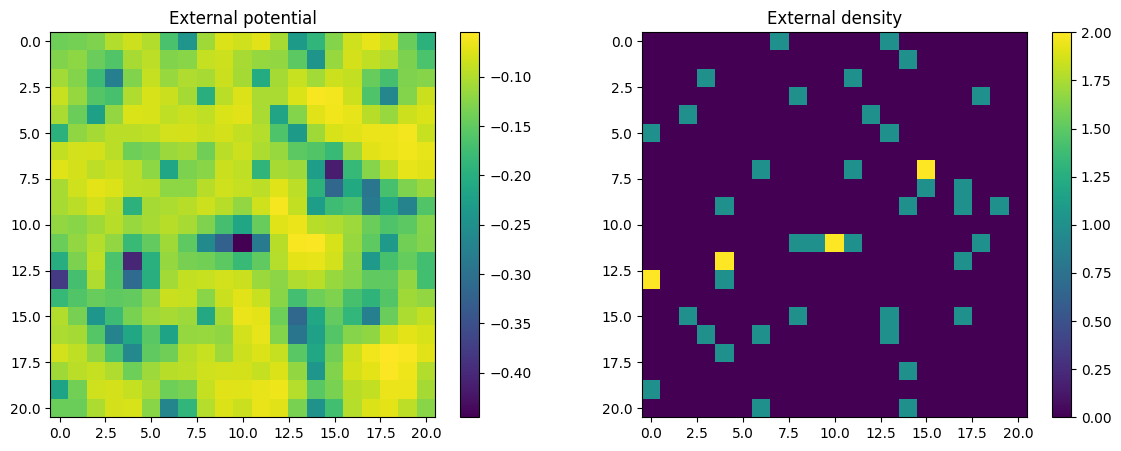

In [46]:

# 2d or higher dimension
Ns = (21,21,21)
Ls = (20.0,20.0,20.0)
alpha = 1
delta_V = np.prod(Ls) / np.prod(Ns)
num_particles = 10*10*10
H = genDiscretizedYukawaInteraction(Ns, Ls, alpha) 
H = np.real(H)

# print(np.sum(H, axis=0)*delta_V)
centers = np.random.uniform(0, np.array(Ns), (num_particles, len(Ns)))  # Generate random positions in all dimensions
masses = np.ones(num_particles)
rho_ext = np.zeros(Ns)
for i in range(num_particles):
    indices = tuple(int(coord) for coord in centers[i])  # Convert coordinates to integer indices
    rho_ext[indices] += masses[i]

potential_ext = -H@rho_ext.flatten()
potential_ext = potential_ext.reshape(Ns)

plt.figure(figsize=(14,5),dpi=100)
plt.subplot(1,2,1)
plt.imshow(potential_ext[20,:,:])
plt.title("External potential")
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(rho_ext[20,:,:])
plt.title("External density")
plt.colorbar()
plt.show()
